In [92]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('linear_reg_ex/canada_per_capita_income.csv')

In [82]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [83]:
%matplotlib inline

In [84]:
#remane columns
df.rename(columns = {df.columns[1]: 'per_capital_income'}, inplace=True)
df.head()

,year,per_capital_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0, 0.5, 'Income')

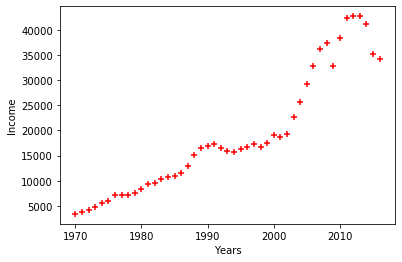

In [85]:
plt.scatter(df.year, df.per_capital_income, color='red', marker='+')
plt.xlabel('Years')
plt.ylabel('Income')

In [86]:
year = df.drop('per_capital_income',axis='columns')
year.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [87]:
income = df.per_capital_income
income.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per_capital_income, dtype: float64

In [91]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(year, income)

LinearRegression()

In [90]:
reg.predict([[2020]])

/home/daud/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [68]:
reg.coef_

array([828.46507522])

In [69]:
reg.intercept_

-1632210.7578554575

In [70]:
#Y = m * X + b (m is coefficient and b is intercept)
2020*828.46507522 + -1632210.7578554575

41288.694088942604

In [71]:
#predict 2020 capital of canada
reg.predict([[2022]])

/home/daud/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42945.62424486])

In [73]:
#prediction years dataset
df_predict_year = pd.read_csv("linear_reg_ex/years.csv")
df_predict_year

,predict_year
0,2017
1,2018
2,2019
3,2020
4,2021
5,2022
6,2023
7,2024
8,2025


In [74]:
prediction_years = reg.predict(df_predict_year)
prediction_years

/home/daud/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- predict_year
Feature names seen at fit time, yet now missing:
- year

  warnings.warn(message, FutureWarning)


array([38803.29886875, 39631.76394397, 40460.22901919, 41288.69409442,
       42117.15916964, 42945.62424486, 43774.08932009, 44602.55439531,
       45431.01947053])

In [75]:
df_predict_year['capital_income'] = prediction_years
df_predict_year

,predict_year,capital_income
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
5,2022,42945.624245
6,2023,43774.089320
7,2024,44602.554395
8,2025,45431.019471


In [76]:
df_predict_year.to_csv("prediction.csv")